In [1]:
import findspark
findspark.init()

In [2]:
from pyspark import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [3]:
import matplotlib.pyplot as plt

In [4]:
sc = SparkContext()
spark = SparkSession(sc)

### 1. Đọc tập tin Fifa2018_dataset.csv vào fifa_df

In [5]:
# Create a Dataframe from CSV file. Load the dataframe
fifa_df = spark.read.csv('../../Data/Fifa2018_dataset.csv', header=True, inferSchema=True)

### 2. In schema của fifa_df. Hiển thị 2 dòng đầu tiên của dữ liệu. Cho biết dữ liệu có bao nhiêu dòng?

In [6]:
# Check the schema of columns
fifa_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [7]:
# Show the first 3 observations
fifa_df.toPandas().head(2)

,_c0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0


In [8]:
# Print the total number of rows
print("There are {} rows in the fifa_df Dataframe".format(fifa_df.count()))

There are 17981 rows in the fifa_df Dataframe


### 3. Tạo view 'fifa_table' từ fifa_df

In [9]:
# Create a temporary view of fifa_df
fifa_df.createOrReplaceTempView('fifa_table')

### 4. Hãy thực hiện SQL Query để lấy cột Age của các vận động viên có Nationality là "Germany" => fifa_germany_age. Hiển thị 3 dòng đầu tiên của dữ liệu. In thống kê dữ liệu

In [10]:
# Construct the query
query = 'SELECT Age FROM fifa_table WHERE Nationality == "Germany"'
# Apply the SQL "query"
fifa_german_age = spark.sql(query)

In [11]:
fifa_german_age.show(3)

+---+
|Age|
+---+
| 31|
| 27|
| 28|
+---+
only showing top 3 rows



In [12]:
fifa_german_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293752|
|    min|               16|
|    max|               36|
+-------+-----------------+



### 5. Trực quan hóa dữ liệu fifa_germany_age. Nhận xét biểu đồ

In [13]:
# Convert fifa_germany_age tho fifa_germany_age_pandas DataFrame
fifa_germany_age_pandas = fifa_german_age.toPandas()

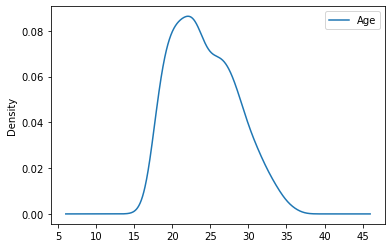

In [14]:
fifa_germany_age_pandas.plot(kind='density')
plt.show()

### 6. Từ fifa_df, cho biết mỗi độ tuổi có bao nhiêu cầu thủ. Độ tuổi trung bình của cầu thủ mỗi quốc gia là bao nhiêu?

In [15]:
fifa_df.groupBy("Age").count().show()

+---+-----+
|Age|count|
+---+-----+
| 31|  671|
| 34|  272|
| 28| 1051|
| 26| 1202|
| 27| 1152|
| 44|    2|
| 22| 1324|
| 47|    1|
| 16|   13|
| 20| 1245|
| 40|    8|
| 19| 1069|
| 41|    3|
| 43|    2|
| 37|   69|
| 17|  258|
| 35|  191|
| 39|   20|
| 23| 1394|
| 38|   36|
+---+-----+
only showing top 20 rows



In [16]:
fifa_df.groupBy("Nationality").avg("Age").show()

+--------------+------------------+
|   Nationality|          avg(Age)|
+--------------+------------------+
|          Chad|              25.0|
|        Russia| 25.23202614379085|
|      Paraguay| 26.10144927536232|
|       Senegal|25.046511627906977|
|        Sweden|25.119565217391305|
|        Guyana|              28.0|
|       Eritrea|              32.0|
|   Philippines|25.666666666666668|
|          Fiji|              29.0|
|        Turkey|25.127147766323024|
|          Iraq|              26.0|
|       Germany| 24.20263157894737|
|St Kitts Nevis|26.666666666666668|
|       Comoros| 27.11111111111111|
|   Afghanistan|              22.0|
|   Ivory Coast| 24.10891089108911|
|         Sudan|              22.5|
|        France|24.634969325153374|
|        Greece|24.418367346938776|
|        Kosovo|           23.9375|
+--------------+------------------+
only showing top 20 rows



### 7. Từ fifa_df, cho biết "Age" nhỏ nhất, "Age" lớn nhất. "Strength" nhỏ nhất, "Strength" lớn nhất

In [17]:
fifa_df.groupBy("Nationality").agg(F.min("Age"), F.max("Age"),
                                   F.min("Strength"), F.max("Strength")).show()

+--------------+--------+--------+-------------+-------------+
|   Nationality|min(Age)|max(Age)|min(Strength)|max(Strength)|
+--------------+--------+--------+-------------+-------------+
|          Chad|      24|      26|           73|           79|
|      Paraguay|      18|      37|           33|           91|
|        Russia|      17|      37|           26|           93|
|       Senegal|      18|      34|           37|           94|
|        Sweden|      17|      37|           21|           91|
|        Guyana|      25|      34|           47|           75|
|       Eritrea|      32|      32|           85|           85|
|   Philippines|      22|      28|           42|           76|
|          Fiji|      29|      29|           57|           57|
|        Turkey|      17|      39|           30|           90|
|          Iraq|      21|      30|           55|           86|
|       Germany|      16|      36|           28|           94|
|St Kitts Nevis|      23|      32|           32|       

### 8. Liệt kê danh sách các "Club" (duy nhất) theo 2 cách với DataFrame fifa_df và SQL query với fifa_table

In [18]:
fifa_df.select("Club").distinct().show()

+--------------------+
|                Club|
+--------------------+
|             Palermo|
|         Yeovil Town|
|  1. FC Union Berlin|
|  Santiago Wanderers|
|               Carpi|
|Evkur Yeni Malaty...|
|          Sagan Tosu|
|            FC Basel|
|  Argentinos Juniors|
|       Karlsruher SC|
|  Lorca Deportiva CF|
|     SC Paderborn 07|
|     Cheltenham Town|
|San Lorenzo de Al...|
|         SC Freiburg|
|  SpVgg Unterhaching|
|Atletico Nacional...|
|Universidad Católica|
|         GFC Ajaccio|
|           FC Luzern|
+--------------------+
only showing top 20 rows



In [19]:
query = '''SELECT DISTINCT Club FROM fifa_table'''
fifa_clubs = spark.sql(query)
fifa_clubs.show()

+--------------------+
|                Club|
+--------------------+
|             Palermo|
|         Yeovil Town|
|  1. FC Union Berlin|
|  Santiago Wanderers|
|               Carpi|
|Evkur Yeni Malaty...|
|          Sagan Tosu|
|            FC Basel|
|  Argentinos Juniors|
|       Karlsruher SC|
|  Lorca Deportiva CF|
|     SC Paderborn 07|
|     Cheltenham Town|
|San Lorenzo de Al...|
|         SC Freiburg|
|  SpVgg Unterhaching|
|Atletico Nacional...|
|Universidad Católica|
|         GFC Ajaccio|
|           FC Luzern|
+--------------------+
only showing top 20 rows



### 9. Từ fifa_df, sắp xếp dữ liệu giảm dần theo Age => fifa_df_desc

In [20]:
fifa_df_desc = fifa_df.orderBy(fifa_df["Age"].desc())
fifa_df_desc.select("Name", "Age", "Strength").show(3)

+-------------+---+--------+
|         Name|Age|Strength|
+-------------+---+--------+
|B. Richardson| 47|      47|
| E. El Hadary| 44|      73|
|     O. Pérez| 44|      66|
+-------------+---+--------+
only showing top 3 rows



### 10. Có bao nhiêu cầu thủ trong "Name" có "Cristiano" theo 2 cách với DataFrame fifa_df và SQL query với fifa_table. In tên các cầu thủ này.

In [21]:
people_with_Cristiano = fifa_df.where(fifa_df["Name"].contains("Cristiano"))
people_with_Cristiano.count()

3

In [22]:
people_with_Cristiano.select("Name").show()

+-----------------+
|             Name|
+-----------------+
|Cristiano Ronaldo|
|        Cristiano|
|        Cristiano|
+-----------------+



In [23]:
query = '''SELECT * FROM fifa_table WHERE Name LIKE "%Cristiano%"'''
people_with_Cristiano_2 = spark.sql(query)
people_with_Cristiano_2.count()

3

In [24]:
people_with_Cristiano_2.select("Name").show()

+-----------------+
|             Name|
+-----------------+
|Cristiano Ronaldo|
|        Cristiano|
|        Cristiano|
+-----------------+

